### **DepEd Philippines School Masterlist (2020-2021)**

#### **1. Dataset Overview**
This masterlist contains 60,924 Philippine schools (primary and secondary) for the 2020–2021 academic year, with each row detailing a single institution. It includes administrative hierarchy (Region, Division, District, Legislative District), identifiers (BEIS School ID), and location specifics (Municipality, Barangay, Street Address). It also records whether the school is Public or Private, its Urban/Rural setting, its DepEd management subclassification, and its curriculum‐offering category.

#### **2. Data Cleaning**

**Load the dataset** 

In [21]:
import pandas as pd

dep = pd.read_csv("SY-2020-2021-Masterlist-of-Schools.csv") # import the dataset into a DF
dep.info() # Check number of rows and columns if the data is complete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60924 entries, 0 to 60923
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Region                                       60924 non-null  object
 1   Division                                     60924 non-null  object
 2   District                                     60924 non-null  object
 3   BEIS School ID                               60924 non-null  int64 
 4   School Name                                  60924 non-null  object
 5   Street Address                               59174 non-null  object
 6   Municipality                                 60924 non-null  object
 7   Legislative District                         60924 non-null  object
 8   Barangay                                     60873 non-null  object
 9   Sector                                       60924 non-null  object
 10  Urban/Rura

**Perform initial diagnostics on the data**

In [22]:
print(dep.head(10).to_string(index=True)) # Check the first 10 rows of the DF if it matches the actual CSV

     Region      Division   District  BEIS School ID                         School Name                            Street Address Municipality Legislative District           Barangay  Sector      Urban/Rural School Subclassification Modified Curricural Offering Classification
0  Region I  Ilocos Norte  Bacarra I          100001                  Apaleng-Libtong ES  Brgy. 21, Libtong, Bacarra, Ilocos Norte      BACARRA         1st District            LIBTONG  Public  Partially Urban            DepED Managed                                   Purely ES
1  Region I  Ilocos Norte  Bacarra I          100002                         Bacarra CES                                Santa Rita      BACARRA         1st District  SANTA RITA (POB.)  Public  Partially Urban            DepED Managed                                   Purely ES
2  Region I  Ilocos Norte  Bacarra I          100003                            Buyon ES                                      NONE      BACARRA         1st District  

**Correct a misspelled column name**  
(Modified *Curricural* Offering Classification)

In [23]:
dep = dep.rename(columns={"Modified Curricural Offering Classification": "Modified Curricular Offering Classification"})
print(dep.columns.to_list())

['Region', 'Division', 'District', 'BEIS School ID', 'School Name', 'Street Address', 'Municipality', 'Legislative District', 'Barangay', 'Sector', 'Urban/Rural', 'School Subclassification', 'Modified Curricular Offering Classification']


**Check for null values**

In [24]:
n = dep.isnull().sum() # Get the number of null values in the dataset
print(f'Number of null values per column: \n{n}')
n_in = dep.index[dep.isnull().any(axis=1)].tolist() # Point indices of null values if there's any
print("\nIndices with missing values:", n_in)
if n_in: # Display the null values if there's any
    print("\nLRows containing null values:")
    print(dep.loc[n_in])
else:
    print("\nNo rows with missing values found.")

Number of null values per column: 
Region                                            0
Division                                          0
District                                          0
BEIS School ID                                    0
School Name                                       0
Street Address                                 1750
Municipality                                      0
Legislative District                              0
Barangay                                         51
Sector                                            0
Urban/Rural                                       0
School Subclassification                          0
Modified Curricular Offering Classification       0
dtype: int64

Indices with missing values: [36, 66, 68, 74, 76, 77, 312, 377, 406, 407, 409, 411, 412, 413, 415, 416, 417, 419, 420, 422, 423, 429, 432, 438, 440, 441, 443, 448, 450, 456, 463, 464, 466, 472, 481, 485, 487, 488, 497, 498, 499, 502, 512, 518, 534, 584, 586, 591, 592, 596, 6

**Since there are null values in 2 columns, fill the nulls in the given fields**

In [25]:
dep['Street Address'] = dep['Street Address'].fillna('Data Unavailable') # Fill nulls in the two fields
dep['Barangay']       = dep['Barangay'].fillna('Not provided')
new_null_count = dep[['Street Address','Barangay']].isnull().sum() # Recheck null counts
print(new_null_count) 

Street Address    0
Barangay          0
dtype: int64


**Check for duplicate entries** 

In [26]:
dup = dep.duplicated().sum() # Get the number of duplicate entries in the dataset
print(f'Number of duplicate entries: {dup}')
dup_in = dep.index[dep.duplicated()].tolist() # Point indices of duplicate rows if there's any
print('Indices with duplicate entries:',dup_in)
if dup: # Display the actual duplicate rows if there's any
    print("\nList of the duplicate entries:")
    print(dep.loc[dup_in])
else:
    print('No duplicate entries found')

Number of duplicate entries: 0
Indices with duplicate entries: []
No duplicate entries found


**Look for typographical errors in the dataset**

In [27]:
category = dep.select_dtypes(include="object").columns.tolist()
print("Sanity checks on categories")
for col in category:
    vc = dep[col].value_counts(dropna=False)
    mis = vc[vc <= 2]            # categories with 2 or fewer occurrences
    if not mis.empty:
        print(f"\nColumn: {col}")
        print("\nValue counts:")
        print(vc.head(10))
        print("\nPossibly misspelled categories where count ≤ 2:")
        print(mis)

Sanity checks on categories

Column: District

Value counts:
District
School District    810
District I         367
San Fernando       329
North District     276
Cagayan de O       220
Rizal              200
Caloocan Nort      200
Taguig District    198
Sta. Maria         197
San Jose           188
Name: count, dtype: int64

Possibly misspelled categories where count ≤ 2:
District
South Glan - C    2
Tondo XII         2
Sta. Ana II       2
Sampaloc VI       2
Sta. Cruz II      2
Tondo X           2
Tondo VIII        2
Tondo VI          2
Singalong         1
Sampaloc IX       1
Tondo VII         1
Curriculum Im     1
North Glan - C    1
Cabuyao           1
Name: count, dtype: int64

Column: School Name

Value counts:
School Name
San Isidro ES                    127
San Jose ES                      110
San Isidro Elementary School      87
San Vicente ES                    87
San Roque ES                      83
San Antonio ES                    76
San Juan ES                       64
Sta

**Correct misspellings in the *District* column**

In [28]:
mapping = {
    "Cagayan de O": "Cagayan de Oro",
    "Caloocan Nort": "Caloocan North"
}
dep['District'] = dep['District'].replace(mapping) # Apply above replacements in District column
dep['District'].replace('Curriculum Im', 'School District', inplace=True) # Replace CI with SD because it's same
updated_counts = dep['District'].value_counts() # Show updated value counts for District
print(updated_counts)

District
School District    811
District I         367
San Fernando       329
North District     276
Cagayan de Oro     220
                  ... 
Tondo VII            1
Cabuyao              1
Singalong            1
North Glan - C       1
Sampaloc IX          1
Name: count, Length: 2189, dtype: int64


C:\Users\U S E R - P C\AppData\Local\Temp\ipykernel_12860\279807017.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dep['District'].replace('Curriculum Im', 'School District', inplace=True) # Replace CI with SD because it's same


**Standardize and clean the *Street Address* values:**
- Treat '-', 'none', 'not applicable', and any case variants as 'Data Unavailable'
- Remove leading hyphens from actual addresses (e.g., '-Del Carmen' → 'Del Carmen')

In [29]:
import re

def csa(val):
    if pd.isnull(val):
        return "Data Unavailable"
    
    text = str(val).strip()
    text = re.sub(r"^-+\s*", "", text) # Remove leading hyphens and spaces
    lower = text.lower()
    
    if lower in ["", "0", "n/a", "-", "none", "not applicable", "data unavailable"]: # map these placeholder to a single label
        return "Data Unavailable"
    
    return text

dep["Street Address"] = dep["Street Address"].apply(csa) # Apply the cleaning function
print(dep["Street Address"].value_counts().head(20))


Street Address
Data Unavailable     6015
Purok 2               455
Purok 1               452
Purok 3               376
National Highway      326
Poblacion             306
Purok 4               216
Purok 5               189
National Road         177
Provincial Road       141
Brgy Road             111
Maharlika Highway     104
Centro                103
Purok 6                94
Zone 1                 78
Zone 3                 75
Proper                 73
San Isidro             67
PUROK 1                62
Zone 2                 60
Name: count, dtype: int64


**Correct the misspelled values in *Municipality* column**

In [30]:
ma = {
    "CARASI": "CARASI",
    "nQ,U NEoZrOthN F CaIiTrvYiew": "QUEZON CITY",
    "QCiUtyE (ZIOn Nfr oCnITtY": "QUEZON CITY",
    "QityUEZON CITY": "QUEZON CITY",
    "uQeUzoEnZO CNit yCITY": "QUEZON CITY",
    "yQUEZON CITY": "QUEZON CITY",
    "iCtyITY OF MANDALUYONG": "MANDALUYONG CITY",
    ",CITY OF MANDALUYONG": "MANDALUYONG CITY",
    "tCyITY OF MAKATI": "MAKATI CITY",
    "iCgI TCYit yOF PASIG": "PASIG CITY",
    "C CITitYy OF PARAÑAQUE": "PARAÑAQUE CITY",
    "oCtITeY R Od.F, LaAsS  PPiIñÑaAS": "LAS PIÑAS CITY",
    "TbAaGl UCiItGy CITY": "TAGUIG CITY",
    "pCaIT CYi tOyF MUNTINLUPA": "MUNTINLUPA CITY",
    "eCsITt YC iOtyF MUNTINLUPA": "MUNTINLUPA CITY",
    "CeITssY  POaFrk MUNTINLUPA": "MUNTINLUPA CITY",
    "CPIaTrYk  O2F MUNTINLUPA": "MUNTINLUPA CITY",
    "KigAaLOOKAN CITY": "CALOOCAN CITY",
    ",C CAaVvIiTteE CITY": "CAVITE CITY",
    "CinITaYn OF URDANETA": "URDANETA CITY",
    "CitIyTY OF PANABO": "PANABO CITY",
    "CaITY OF CALAMBA": "CALAMBA CITY",
    "eILIGAN CITY": "ILIGAN CITY",
    "lIiLgIaGnA CNit CyITY": "ILIGAN CITY",
    "ICTIYT,Y L OAFG USANNATA ROSA": "SANTA ROSA CITY",
    "BrA, CaOvOitRe": "BACOOR CITY",
    "oRnOtDalRbIaGnU, ERZiz (aMlONTALBAN)": "RODRIGUEZ (MONTALBAN)",
    "OCrAoG CAiYtyA,N M DisE ORO CITY (Capital)": "CAGAYAN DE ORO CITY",
    "nSaAN PEDRO": "SAN PEDRO",
    "nCeABUYAO": "CABUYAO",
    "aCsI TCYit Oy,F C GavEiNteERAL TRIAS": "GENERAL TRIAS CITY",
    "Dy AVAO CITY": "DAVAO CITY",
    "Dt DAVavAaOo  CIiTtyY": "DAVAO CITY",
    "CitIyTY OF PANABO": "PANABO CITY",  # repeated, just safe to map again
    "GMEAN,.  CMaAviRteIANO ALVAREZ": "GENERAL MARIANO ALVAREZ",
    "OneLONGAPO CITY": "OLONGAPO CITY",
    "iCjaABANATUAN CITY": "CABANATUAN CITY",
    "NORTHERN KABUNTALAN": "NORTHERN KABUNTALAN",
    "LaAl  CASTELLANA": "LA CASTELLANA",
    "aC RAiIzNaTl A": "LA TRINIDAD",               
    "S, ABNuTlaAc aMnARIA": "SAN NARCISO",         
    "uNrAGA CITY": "URDANETA CITY",                
    "tMy,A PBaAmLApaCnAgTa CITY": "TARLAC CITY"   
}

dep['Municipality'] = dep['Municipality'].replace(mapping) # Apply the mapping

print(dep['Municipality'].value_counts().head(20)) # Verify the top cleaned values

Municipality
QUEZON CITY                      805
DAVAO CITY                       672
KALOOKAN CITY                    320
ZAMBOANGA CITY                   291
CEBU CITY (Capital)              270
SANTA CRUZ                       247
CITY OF ANTIPOLO                 244
SAN JOSE                         238
SANTA MARIA                      233
SAN MIGUEL                       232
CAGAYAN DE ORO CITY (Capital)    220
BUTUAN CITY (Capital)            209
BACOLOD CITY (Capital)           204
CARMEN                           202
TAGUIG CITY                      196
BACOOR                           195
ILOILO CITY (Capital)            193
QUEZON                           192
PILAR                            191
CITY OF CALAMBA                  187
Name: count, dtype: int64


**Standardize formatting of the values in *Municipality* column**

In [31]:
def strdmun(name):
    if pd.isnull(name):
        return name

    words = str(name).lower().split()     # normalize casing and split
    fixed = []
    for w in words:
        fixed.append('City' if w == 'city' else w.capitalize())
    joined = ' '.join(fixed)
    
    prefix = "City Of "     # reorder "City Of X" → "X City"
    if joined.startswith(prefix):
        place = joined[len(prefix):]
        return f"{place} City"
    
    return joined

dep['Municipality'] = dep['Municipality'].apply(strdmun) # Apply the  standardization

print(dep['Municipality'].value_counts().head(10)) # Verify the cleaned values

Municipality
Quezon City            805
Davao City             672
Kalookan City          320
Zamboanga City         291
Cebu City (capital)    270
Santa Cruz             247
Antipolo City          244
San Jose               238
Santa Maria            233
San Miguel             232
Name: count, dtype: int64


**Convert the values of *School Name*, *Street Address*, and *Barangay* to title-case**

In [32]:
cols = ['School Name', 'Street Address', 'Barangay']

for col in cols:
    dep[col] = (
        dep[col]
        .astype(str)      
        .str.strip()      # remove whitespace on both ends
        .str.lower()      
        .str.title()      # capitalize first letter of each word
    )

for col in cols:
    print(f"\nTop 10 in {col}:")
    print(dep[col].value_counts().head(10))


Top 10 in School Name:
School Name
San Isidro Es                    128
San Jose Es                      111
San Isidro Elementary School      93
San Vicente Es                    90
San Roque Es                      84
San Antonio Es                    76
San Juan Es                       65
Sta. Cruz Es                      62
San Jose Elementary School        60
San Vicente Elementary School     55
Name: count, dtype: int64

Top 10 in Street Address:
Street Address
Data Unavailable    6015
Purok 1              537
Purok 2              520
Purok 3              435
National Highway     367
Poblacion            348
Purok 4              251
Purok 5              214
National Road        201
Provincial Road      154
Name: count, dtype: int64

Top 10 in Barangay:
Barangay
Poblacion      2004
San Isidro      512
San Jose        378
San Vicente     289
San Antonio     267
San Roque       260
San Juan        241
Santo Nino      221
Santa Cruz      183
San Miguel      169
Name: count, dtype: 

**Identify errors through detection of rare entries where there are only ≤2 occurrences in *Region* and *Division***

In [33]:
for col in ["Region", "Division"]: # Check for rare values these 2 col
    vc = dep[col].value_counts()
    anomalies = vc[vc <= 2] # filter to values that occur 2 times or fewer
    if anomalies.empty:
        print(f"No rare entries found in {col}.")
    else:
        print(f"\nColumn: {col} – entries with very low count:")
        print(anomalies)

No rare entries found in Region.
No rare entries found in Division.


In [34]:
# Cleaned version of the dataset
print(dep.head(10).to_string())

     Region      Division   District  BEIS School ID                         School Name                            Street Address Municipality Legislative District           Barangay  Sector      Urban/Rural School Subclassification Modified Curricular Offering Classification
0  Region I  Ilocos Norte  Bacarra I          100001                  Apaleng-Libtong Es  Brgy. 21, Libtong, Bacarra, Ilocos Norte      Bacarra         1st District            Libtong  Public  Partially Urban            DepED Managed                                   Purely ES
1  Region I  Ilocos Norte  Bacarra I          100002                         Bacarra Ces                                Santa Rita      Bacarra         1st District  Santa Rita (Pob.)  Public  Partially Urban            DepED Managed                                   Purely ES
2  Region I  Ilocos Norte  Bacarra I          100003                            Buyon Es                          Data Unavailable      Bacarra         1st District  

**In terms of identifying and treating outliers:**   

*This dataset contains only identifiers, administrative codes, and categorical labels. There are no continuous metrics like enrollment figures or budgets that might produce meaningful outliers, thus running IQR or Z-score checks on fields such as the BEIS School ID would only flag the highest or lowest ID numbers, which have no essential interpretation. Therefore, it can be said that outlier detection isn’t applicable here.*

#### **3. Descriptive Statistics**

*This dataset doesn’t contain any continuous numeric fields in which it only has an identifier (BEIS School ID) and various categorical columns. Calculating the mean, median, standard deviation, or inspecting numeric distributions isn’t applicable here.*

**Calculate the frequency table for all columns**

In [35]:
dep["BEIS School ID"] = dep["BEIS School ID"].astype(str).str.zfill(6) # Make sure that BEIS School ID is a 6-digit string
cate_col = dep.select_dtypes(include=["object"]).columns.tolist() # Identify all categorical features

for col in cate_col:
    counts = dep[col].value_counts() # Count occurences for each category
    perc   = (counts / len(dep) * 100).round(2) # Compute each category’s % of total rows
    freq_df = pd.DataFrame({"count": counts, "percent": perc})
    
    print(f"\nFrequency Table per: {col}")
    print(freq_df.head(10).to_string()) # Display top 10 values


Frequency Table per: Region
             count  percent
Region                     
Region IV-A   6312    10.36
Region III    5258     8.63
Region VI     5089     8.35
Region VII    4661     7.65
Region VIII   4470     7.34
Region V      4445     7.30
Region I      3426     5.62
Region X      3105     5.10
NCR           3059     5.02
Region II     2939     4.82

Frequency Table per: Division
                count  percent
Division                      
Iloilo           1397     2.29
Leyte            1354     2.22
Cebu             1321     2.17
Bohol            1263     2.07
Camarines Sur    1262     2.07
Quezon           1149     1.89
Isabela          1002     1.64
Batangas          978     1.61
North Cotabato    956     1.57
Cagayan           920     1.51

Frequency Table per: District
                 count  percent
District                       
School District    811     1.33
District I         367     0.60
San Fernando       329     0.54
North District     276     0.45
Cagayan d

#### **4. Data Visualization**

##### ***Univariate Analysis:***
- **Bar graph**

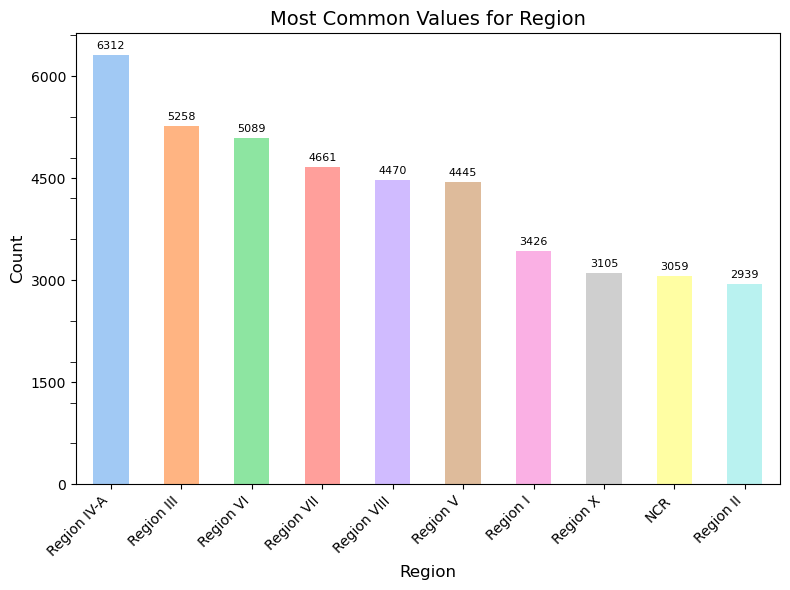

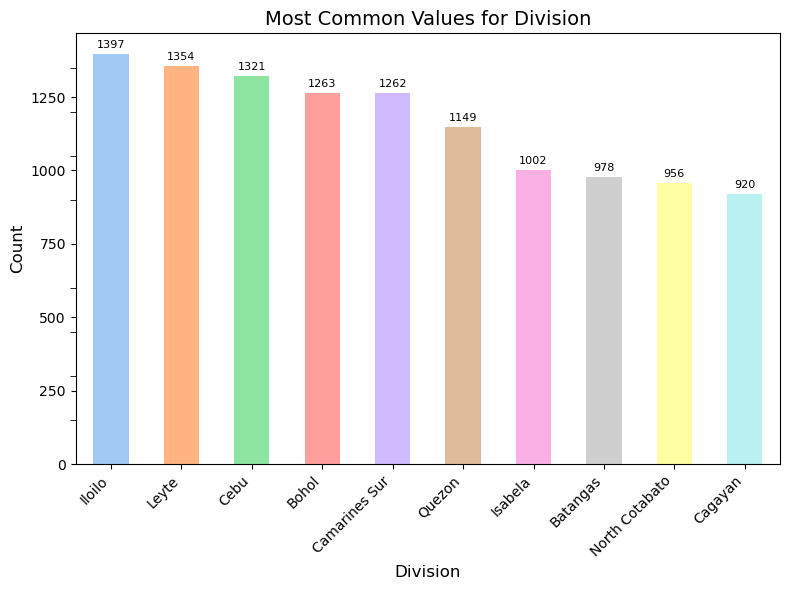

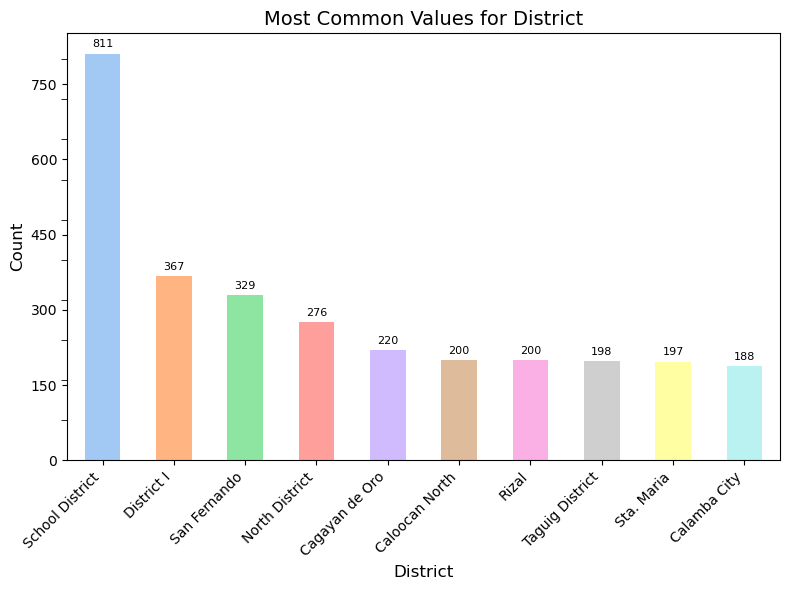

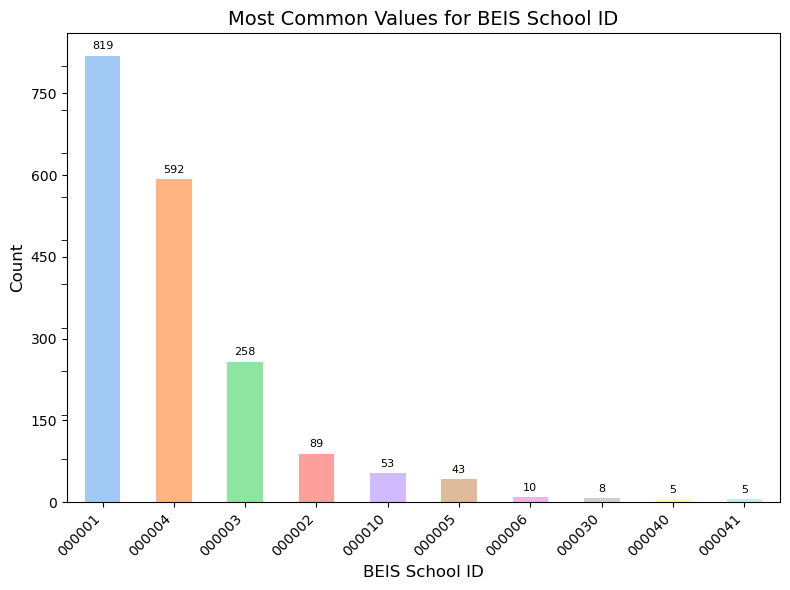

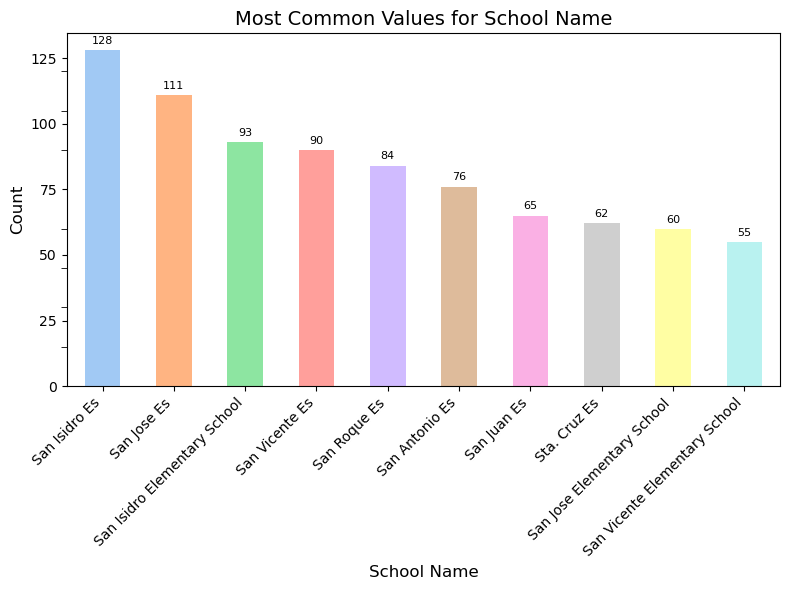

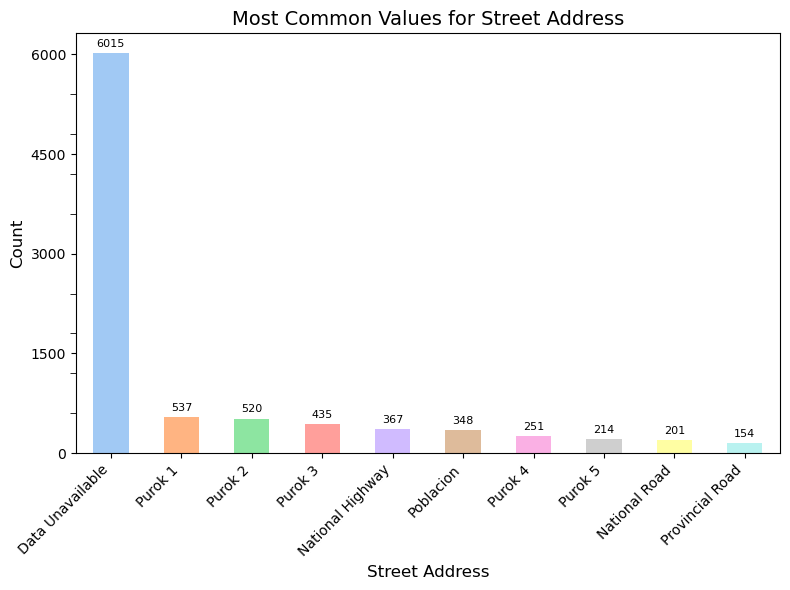

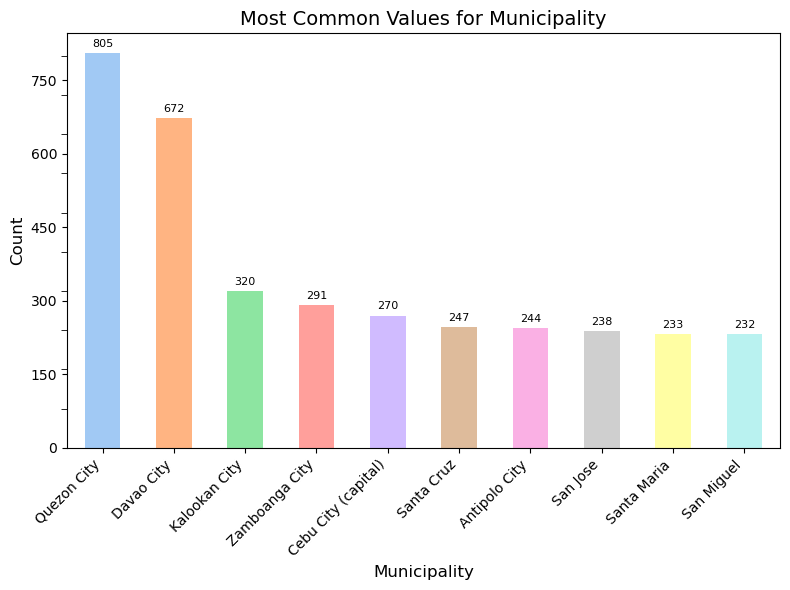

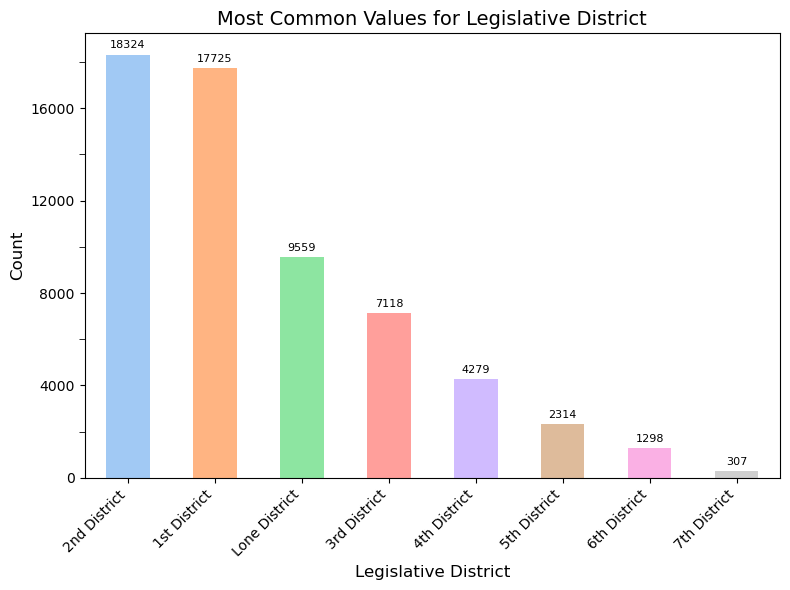

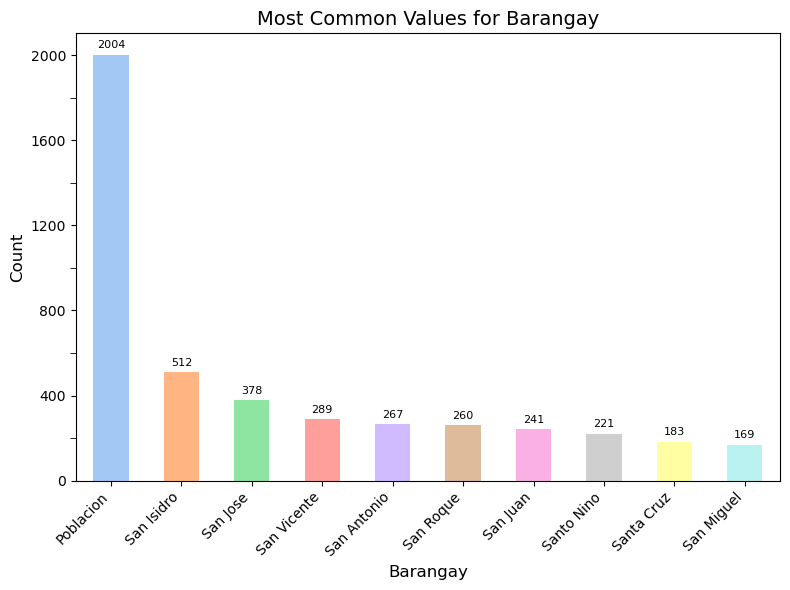

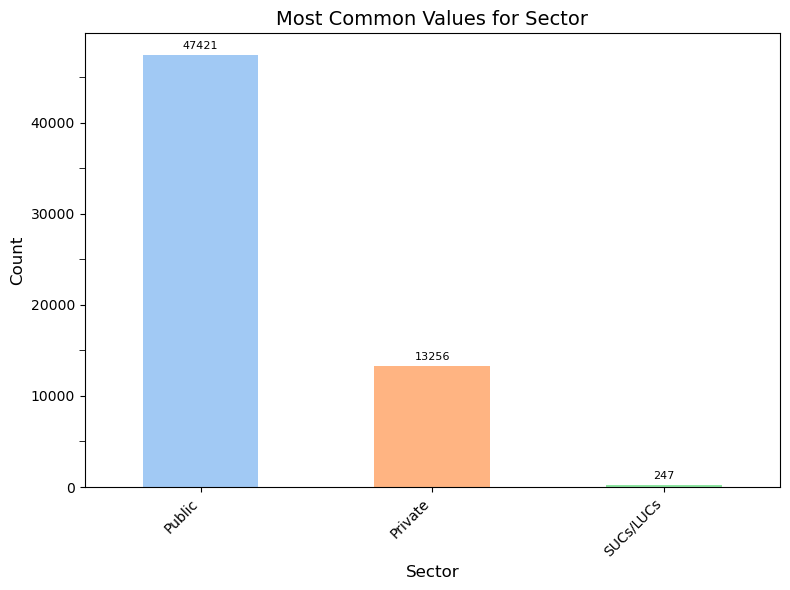

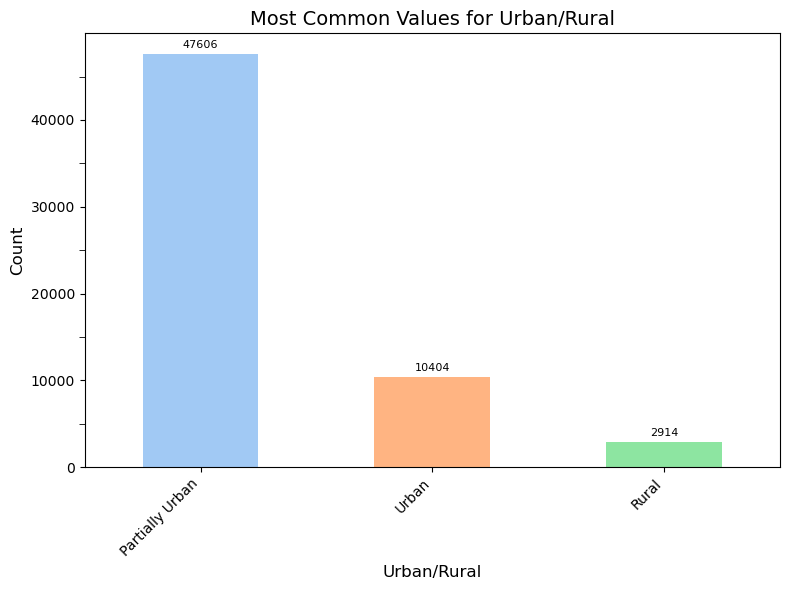

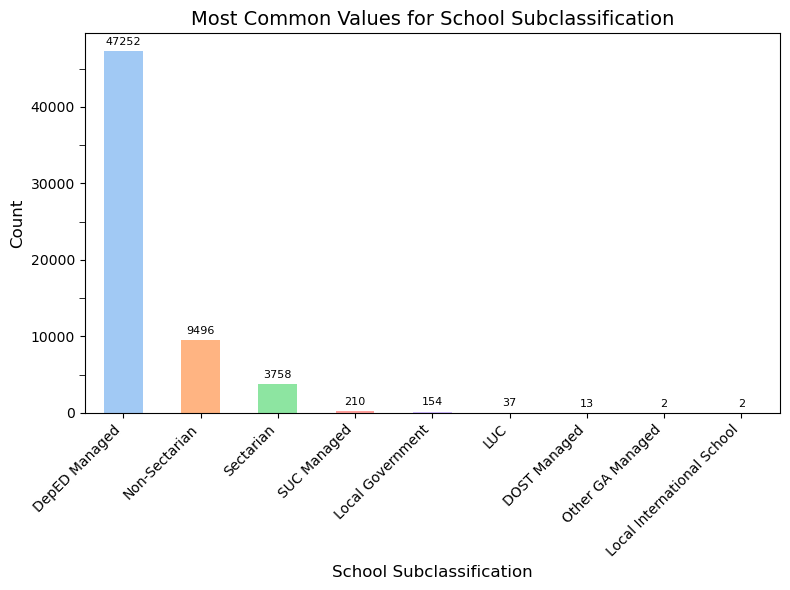

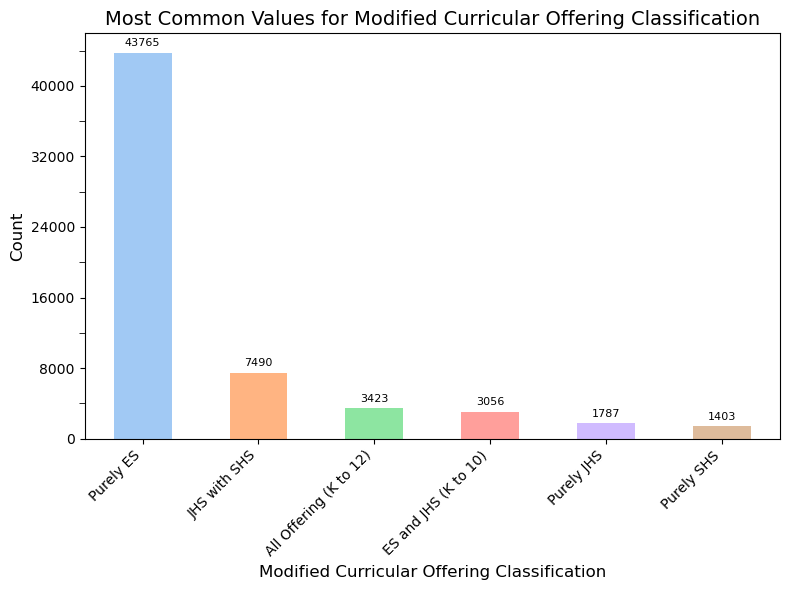

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.ticker import MaxNLocator

cate_col = dep.select_dtypes(include='object').columns.tolist() 
for col in cate_col:
    top10 = dep[col].value_counts().head(10) # display top 10 most frequent values
    colors = sns.color_palette("pastel", n_colors=len(top10)) 
    
    plt.figure(figsize=(8,6))
    ax = top10.plot(
        kind='bar',
        color=colors
    )
    
    plt.title(f'Most Common Values for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6)) # limit number of major ticks on y-axis
    ax.yaxis.set_minor_locator(MaxNLocator(nbins=12))
    ax.tick_params(axis='y', which='minor', length=4)
    
    for patch in ax.patches:     # add count above each bar to make small values visible
        height = patch.get_height()
        ax.annotate(
            f'{height}',
            xy=(patch.get_x() + patch.get_width() / 2, height),
            xytext=(0, 3),                
            textcoords="offset points",
            ha='center', 
            va='bottom',
            fontsize=8
        )
    
    plt.tight_layout()
    plt.show()


##### ***Bivariate Analysis:***

- **Heatmap**

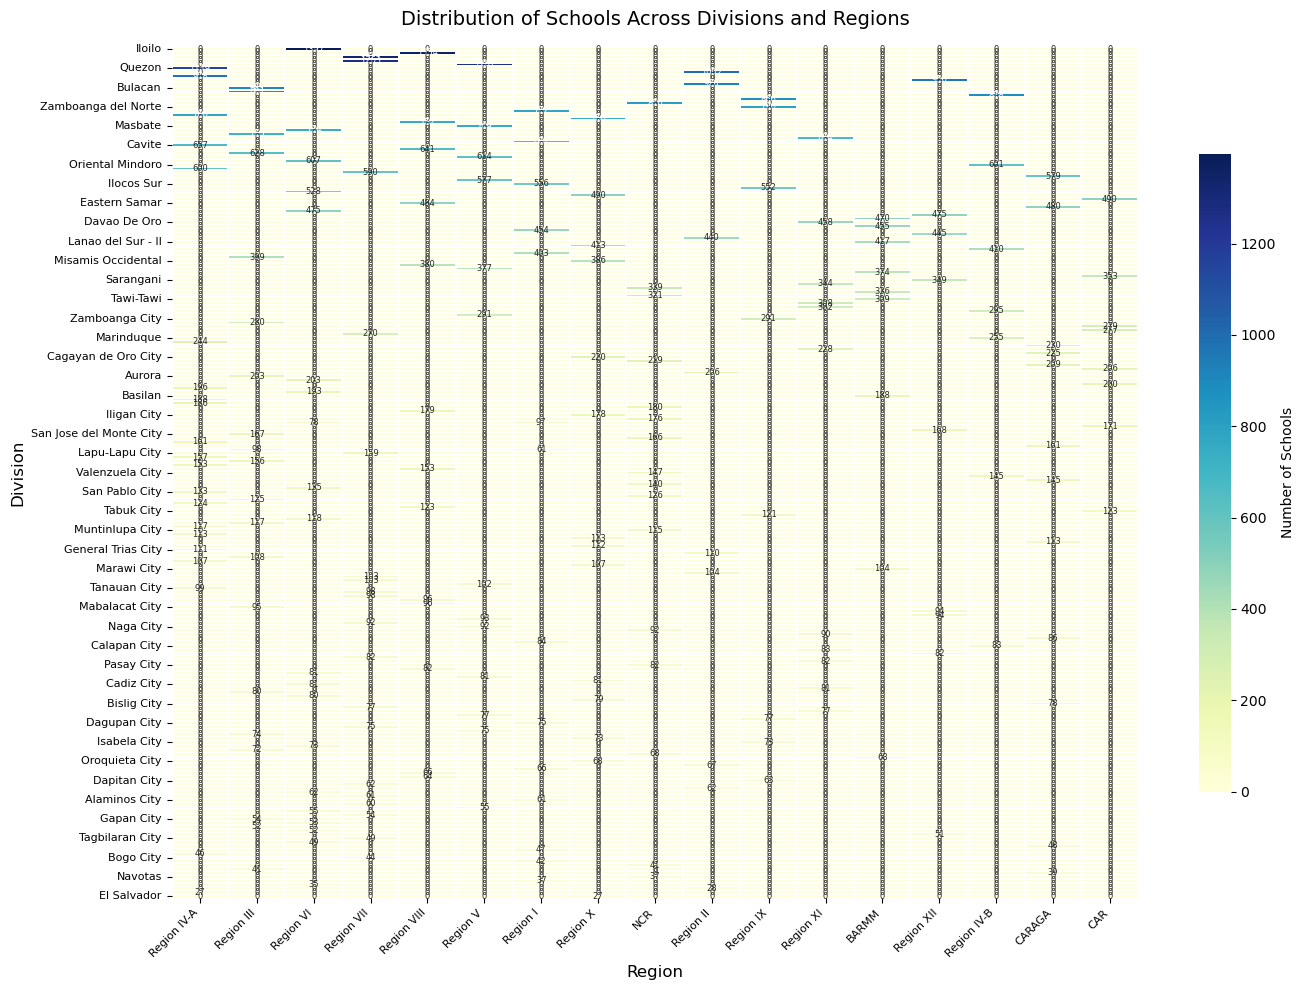

In [37]:
ct = pd.crosstab(dep['Division'], dep['Region'])

row_order = ct.sum(axis=1).sort_values(ascending=False).index # divisions sorted by descending total school count
col_order = ct.sum(axis=0).sort_values(ascending=False).index # regions sorted by descending total school count
ct = ct.loc[row_order, col_order]

plt.figure(figsize=(14,10))
ax = sns.heatmap(
    ct,
    cmap="YlGnBu",           
    annot=True, # Show counts in each cell
    fmt="d",
    annot_kws={"size": 6},  # set font size to make the text fit
    linewidths=0.2,
    linecolor="white", 
    cbar_kws={"label": "Number of Schools", "shrink": .75}
)

ax.set_title("Distribution of Schools Across Divisions and Regions", pad=16, fontsize=14)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Division", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout() # prevent clipping of labels
plt.show()


#### **5. Insights and Hypothesis Formulation**

**Observations**
1. Public schools outnumber private ones by a wide margin wherein “Public” entries account for over 85% of the list, which reflects the government’s primary role in basic education.

2. Rural schools slightly exceed urban ones which indicates that despite urban concentration, a large share of Philippine schools also serve dispersed, rural communities.

3. Various regions like Region I, Region VI, and the National Capital Region (NCR) host thousands of schools, while outlying regions only have a few hundred which shows geographic disparities in educational infrastructure.

**Hypothesis**
1. Urban municipalities will have a higher ratio of private‐to‐public schools than rural municipalities, since private providers tend to concentrate where population density and per‐capita income are greater.  
*Basically, private operators are more likely to set up campuses where they can attract enough students to cover costs and make a profit.*